In [100]:
from keras.src.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.src.models import Sequential
import matplotlib.pyplot as plt
from keras.src.optimizers import Adam
from keras.src.callbacks import EarlyStopping

# Build Model

In [101]:
model = Sequential([
    Input(shape=(12, 28, 3)),                              # Correct: capital 'I'
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(31, activation='softmax')
])

In [102]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 12, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 12, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 10752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │     1,376,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,390,527 (5.30 MB)

 Trainable params: 1,390,527 (5.30 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    rotation_range=5,
    brightness_range=(0.8, 1.2),
    zoom_range=0.1,
    channel_shift_range=0.1,
)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    rotation_range=5,
    brightness_range=(0.8, 1.2),
    zoom_range=0.1,
    channel_shift_range=0.1,
)

train_dir = '/train_data_for_CNN/dataset_vietnam_licenses_plate_train_thresh'
test_dir = '/train_data_for_CNN/dataset_vietnam_license_plate_val_thresh'

# Load images from folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(12, 28),
    batch_size=8,
    class_mode='categorical',
    color_mode='rgb'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(12, 28),
    batch_size=8,
    class_mode='categorical',
    color_mode='rgb'
)

Found 3100 images belonging to 31 classes.
Found 620 images belonging to 31 classes.


In [105]:

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=500,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stop]
)


Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.0173 - loss: 3.4420 - val_accuracy: 0.0419 - val_loss: 3.3892
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0280 - loss: 3.3461
Epoch 3/500
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0599 - loss: 3.3337

/home/minhpn/anaconda3/lib/python3.9/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0658 - loss: 3.3242 - val_accuracy: 0.1468 - val_loss: 3.2445
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1998 - loss: 3.2447
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1975 - loss: 3.1739 - val_accuracy: 0.1371 - val_loss: 3.0487
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1903 - loss: 3.0576
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2914 - loss: 2.7971 - val_accuracy: 0.2597 - val_loss: 2.7588
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2770 - loss: 2.6892
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4156 - loss: 2.5513 - val_accuracy: 0.3210 - val_loss: 2.4335
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3101 - loss: 2.4452
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4607 - loss: 2.1802 - val_accuracy: 0.5000 - val_loss: 2.0258
Epoch 12/500
10/10 ━━━━━━━━━━━

78/78 - 0s - 5ms/step - accuracy: 0.9323 - loss: 0.1959


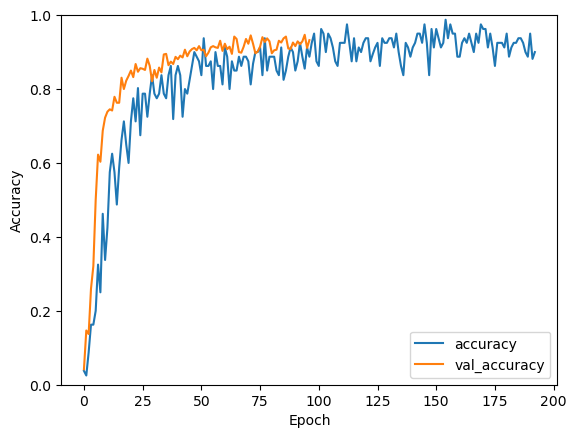

In [106]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

In [107]:
print(test_acc)

0.9322580695152283


In [108]:
model.save("CNN_Model.keras")